# Introduction to Scikit-Learn
## Part 1. Simple Linear Regression

### Resources

#### Scikit-Learn.org
* [Choosing the right estimator](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* [An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)
* [API Reference](http://scikit-learn.org/stable/modules/classes.html)

#### Online tutorials

* [Introduction to Scikit-Learn](https://www.oreilly.com/ideas/intro-to-scikit-learn) (Jake VanderPlas)
* [Machine Learning with Scikit-Learn](http://amueller.github.io/sklearn_tutorial/) (Andreas Mueller)


### Basics of the API

Most of the time, you'll follow these steps when using Scikit-Learn estimators:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
    * For supervised learning, often we predict labels for unknown data using the predict() method.
    * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load a randomly generated dataset from local file.
df = pd.read_csv('data/sklearn-intro-1-data.csv')
print(df.shape)
print(df.sample(3))

(150, 2)
            x           y
100 -0.291731  -27.876662
4    1.702648  121.051667
92   0.438472   33.089129


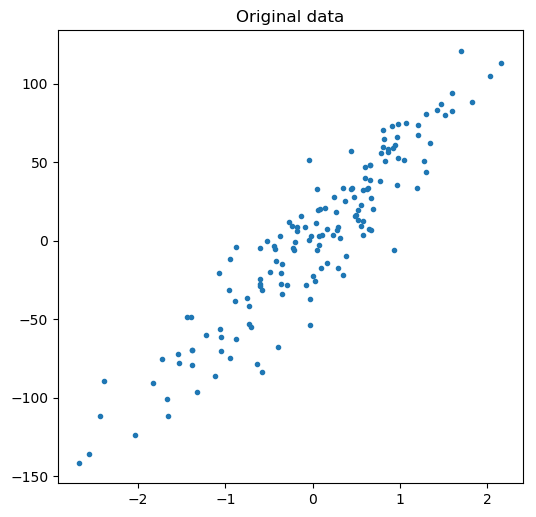

In [3]:
# Plot the original data
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(df['x'], df['y'], marker='.')
plt.title('Original data')
plt.show()

### Step 1: Choose a model and import the estimator from Scikit-Learn

In [4]:
from sklearn.linear_model import LinearRegression

### Step 2: Choose model hyperparameters by instantiating this class with desired values.

In [5]:
clf = LinearRegression() # In this case, no hyperparameteres specified (we take defaults)
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Step 3: Arrange data into a features matrix and target vector following the discussion above.

Scikit-Learn expects the feature matrix to be a 2-dimensional array with `n_samples` rows
and `n_features` columns.

In [6]:
# X and y must always be 2-dimensional (even if there's only one feature in X!)
# X and y are numpy matrices (type numpy.ndarray)
X = df['x'].values.reshape(-1, 1) # reshape to 2-dim array with 1 column
y = df['y'].values.reshape(-1, )

In [7]:
type(X)

numpy.ndarray

In [8]:
X.shape

(150, 1)

In [9]:
X

array([[-1.39343747],
       [ 0.24906239],
       [ 0.64490935],
       [ 0.8026941 ],
       [ 1.70264764],
       [ 0.80900121],
       [-1.54315025],
       [ 1.21039432],
       [ 0.49830295],
       [ 1.19107124],
       [-0.36165835],
       [ 0.38528895],
       [ 0.51550592],
       [ 0.44030397],
       [-0.57471085],
       [ 0.16842011],
       [-0.57573176],
       [ 1.47529717],
       [-0.42033701],
       [ 0.77926089],
       [-0.35426696],
       [-0.95142953],
       [ 0.34660018],
       [-0.22632567],
       [-0.39631676],
       [ 0.6592115 ],
       [-0.70214955],
       [ 1.82289616],
       [-0.08887387],
       [ 2.1632198 ],
       [ 0.82006934],
       [ 1.42760941],
       [ 0.59969818],
       [ 0.54993557],
       [-0.87610476],
       [-0.73225077],
       [-2.56041965],
       [ 0.63012769],
       [-0.03143066],
       [ 0.5802237 ],
       [ 0.86666807],
       [-1.82953002],
       [-1.11983928],
       [-0.8775548 ],
       [ 0.05597963],
       [-0

In [10]:
y.shape

(150,)

### Step 5. 

In [11]:
# Split data into training and test sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333)

In [12]:
X_train.shape

(100, 1)

### Step 4. Fit the model to your data by calling the fit() method of the model instance.

In [13]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
clf.coef_

array([53.56712926])

In [15]:
clf.intercept_

2.7143517602149876

In [16]:
# For the LinearRegression class, the score() method returns R-squared,
# the coefficient of determination. That is, the amount of explained variance. (0 to 1)
clf.score(X_train, y_train)

0.8693612239840767

### Step 5. Apply the Model to new data
For supervised learning, often we predict labels for unknown data using the predict() method.

In [17]:
y_hat = clf.predict(X_test)

Plot the test set, blue for the true data points, red for the predictions.

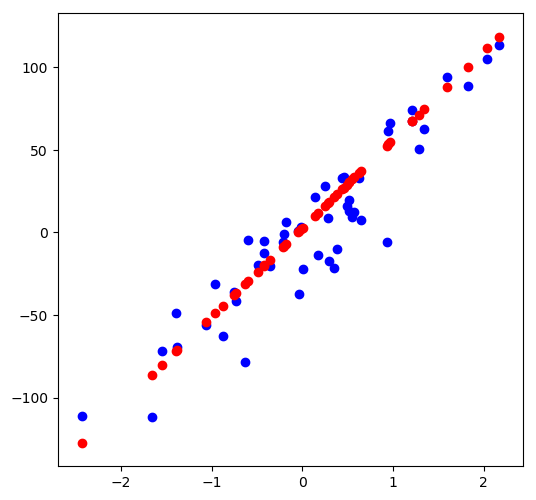

In [18]:
plt.figure(figsize=(6,6), dpi=100)
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_hat, color='red')
plt.show()

In [19]:
print("The equation for the fitted line is: y = %.3fx + %.3f" % (clf.coef_, clf.intercept_))

The equation for the fitted line is: y = 53.567x + 2.714


### Assess the quality of our predictions

In [20]:
# There are three ways to get R-squared in Scikit-Learn:
from sklearn.metrics import explained_variance_score, r2_score
print("1. clf.score()                : %.3f" % clf.score(X_test, y_test))
print("2. r2_score()                 : %.3f" % r2_score(y_test, y_hat))
print("3. explained_variance_score() : %.3f" % explained_variance_score(y_test, y_hat))

1. clf.score()                : 0.846
2. r2_score()                 : 0.846
3. explained_variance_score() : 0.863
